# Non-invasive Sex Identification of T. granosa Using Machine Learning

## Setting up environment

In [24]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
%matplotlib inline

## Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Load and Preprocess Data

In [25]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.0,28.5,3.05
1,120004,43.1,33.05,28.15,21.0,28.5,3.05
2,130004,43.1,33.05,28.15,21.0,28.5,3.05
3,140004,43.1,33.05,28.15,21.0,28.5,3.05
4,150004,43.1,33.05,28.15,21.0,28.5,3.05
...,...,...,...,...,...,...,...
499,110155,NaN,NaN,NaN,NaN,NaN,NaN
500,120155,NaN,NaN,NaN,NaN,NaN,NaN
501,130155,NaN,NaN,NaN,NaN,NaN,NaN
502,140155,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Drop rows with NaN values
male_litob = male_litob.dropna()

# Display the updated dataset
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.10,33.05,28.15,21.0,28.50,3.05
1,120004,43.10,33.05,28.15,21.0,28.50,3.05
2,130004,43.10,33.05,28.15,21.0,28.50,3.05
3,140004,43.10,33.05,28.15,21.0,28.50,3.05
4,150004,43.10,33.05,28.15,21.0,28.50,3.05
...,...,...,...,...,...,...,...
452,120147,38.05,30.05,27.65,20.0,21.05,1.30
453,130147,38.05,30.05,27.65,20.0,21.05,1.30
454,140147,38.05,30.05,27.65,20.0,21.05,1.30
455,150147,38.05,30.05,27.65,20.0,21.05,1.30


In [27]:
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']

male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,110004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
1,120004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
2,130004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
3,140004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
4,150004,43.10,33.05,28.15,21.0,28.50,3.05,1.304085,1.531083
...,...,...,...,...,...,...,...,...,...
452,120147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130
453,130147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130
454,140147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130
455,150147,38.05,30.05,27.65,20.0,21.05,1.30,1.266223,1.376130


In [28]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.10
1,20001,48.05,37.60,32.15,20,33.55,4.10
2,30001,48.05,37.60,32.15,20,33.55,4.10
3,40001,48.05,37.60,32.15,20,33.55,4.10
4,50001,48.05,37.60,32.15,20,33.55,4.10
...,...,...,...,...,...,...,...
419,10142,38.50,30.05,26.05,20,20.05,3.05
420,20142,38.50,30.05,26.05,20,20.05,3.05
421,30142,38.50,30.05,26.05,20,20.05,3.05
422,40142,38.50,30.05,26.05,20,20.05,3.05


In [29]:
# Drop rows with NaN values
female_litob = female_litob.dropna()

# Display the updated dataset
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.10
1,20001,48.05,37.60,32.15,20,33.55,4.10
2,30001,48.05,37.60,32.15,20,33.55,4.10
3,40001,48.05,37.60,32.15,20,33.55,4.10
4,50001,48.05,37.60,32.15,20,33.55,4.10
...,...,...,...,...,...,...,...
420,20142,38.50,30.05,26.05,20,20.05,3.05
421,30142,38.50,30.05,26.05,20,20.05,3.05
422,40142,38.50,30.05,26.05,20,20.05,3.05
423,50142,38.50,30.05,26.05,20,20.05,3.05


In [30]:
# Convert 'Length', 'Width', and 'Height' columns to numeric type
female_litob['Length'] = pd.to_numeric(female_litob['Length'], errors='coerce')
female_litob['Width'] = pd.to_numeric(female_litob['Width'], errors='coerce')
female_litob['Height'] = pd.to_numeric(female_litob['Height'], errors='coerce')

# Now calculate the ratios
female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']

female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
1,20001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
2,30001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
3,40001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
4,50001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557
...,...,...,...,...,...,...,...,...,...
420,20142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927
421,30142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927
422,40142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927
423,50142,38.50,30.05,26.05,20,20.05,3.05,1.281198,1.477927


In [31]:
female_litob['Label'] = 0
male_litob['Label'] = 1

In [32]:
litob_combined = pd.concat([female_litob, male_litob], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,10001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
1,20001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
2,30001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
3,40001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
4,50001,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...,...
877,120147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
878,130147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
879,140147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
880,150147,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1


In [33]:
# remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
1,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
2,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
3,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
4,48.05,37.60,32.15,20.0,33.55,4.1,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...
877,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
878,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
879,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1
880,38.05,30.05,27.65,20.0,21.05,1.3,1.266223,1.376130,1


In [34]:
# Drop duplicate rows based on all columns
litob_combined = litob_combined.drop_duplicates()

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
6,47.40,32.50,32.25,20.0,33.10,3.05,1.458462,1.469767,0
12,43.30,34.10,31.25,21.0,32.05,4.50,1.269795,1.385600,0
18,50.05,35.05,32.05,21.0,30.05,4.10,1.427960,1.561622,0
24,40.25,33.55,32.40,20.0,29.35,3.40,1.199702,1.242284,0
...,...,...,...,...,...,...,...,...,...
852,52.10,39.40,36.05,19.0,28.05,4.40,1.322335,1.445215,1
858,48.05,34.40,31.90,21.0,28.15,5.70,1.396802,1.506270,1
864,54.40,41.75,35.60,20.0,31.10,3.50,1.302994,1.528090,1
870,44.40,35.35,31.55,22.0,27.20,3.05,1.256011,1.407290,1


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'litob_combined' is your DataFrame
# Select the columns you want to scale (excluding 'Label')
cols_to_scale = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

# Display the scaled DataFrame
litob_combined

<ipython-input-35-45cca8a95907>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])


,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,0.373832,0.461728,0.405530,0.6,0.586957,0.089706,0.282637,0.463827,0
6,0.349533,0.209877,0.410138,0.6,0.567391,0.058824,0.595267,0.425835,0
12,0.196262,0.288889,0.364055,0.8,0.521739,0.101471,0.268557,0.296838,0
18,0.448598,0.335802,0.400922,0.8,0.434783,0.089706,0.542448,0.566613,0
24,0.082243,0.261728,0.417051,0.6,0.404348,0.069118,0.147179,0.077190,0
...,...,...,...,...,...,...,...,...,...
852,0.525234,0.550617,0.585253,0.4,0.347826,0.098529,0.359540,0.388205,1
858,0.373832,0.303704,0.394009,0.8,0.352174,0.136765,0.488493,0.481778,1
864,0.611215,0.666667,0.564516,0.6,0.480435,0.072059,0.326047,0.515221,1
870,0.237383,0.350617,0.377880,1.0,0.310870,0.058824,0.244688,0.330081,1


In [36]:
litob_combined.to_csv('litob_combined.csv', index=False)

## Dataset Inspection and Visualizations

In [37]:
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio', 'Label'],
      dtype='object')

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Rib count'}>,
        <Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>],
       [<Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>, <Axes: >]], dtype=object)

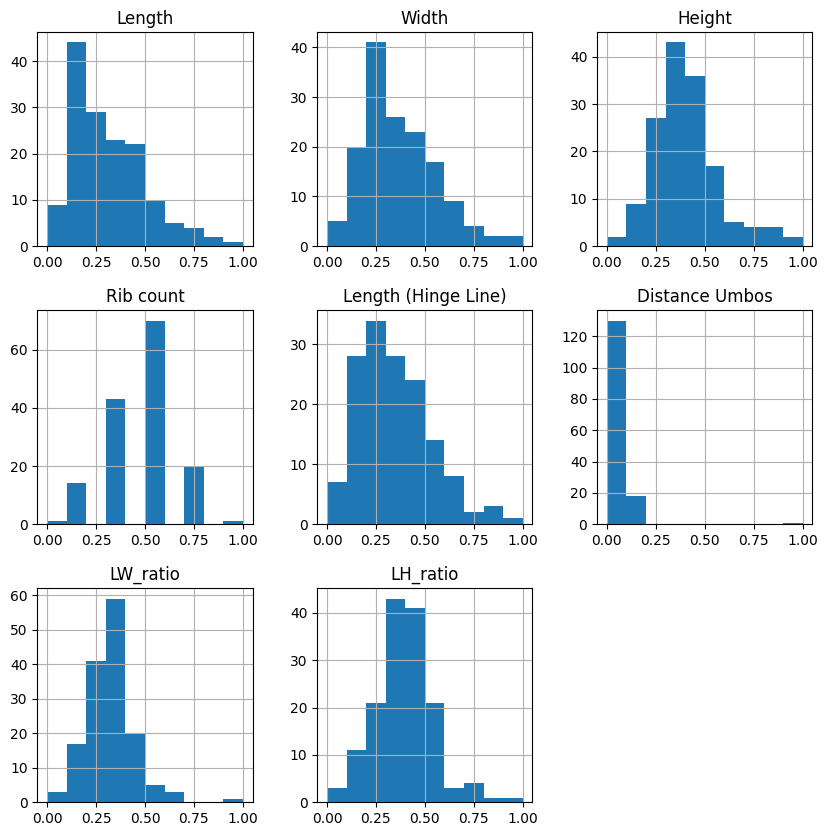

In [38]:
litob_combined_explore = litob_combined.drop(columns=['Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

In [39]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.312363,0.366165,0.403223,0.530201,0.348062,0.064597,0.325917,0.394812
std,0.187137,0.186536,0.165230,0.175416,0.184502,0.083782,0.124916,0.149128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.186916,0.237037,0.297235,0.400000,0.217391,0.032353,0.257188,0.307593
50%,0.252336,0.335802,0.377880,0.600000,0.313043,0.058824,0.321663,0.389291
75%,0.426168,0.483951,0.472350,0.600000,0.478261,0.077941,0.382951,0.473295
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
litob_combined.Label.value_counts()

,count
Label,
1,77
0,72


<ipython-input-43-398cd9e97a54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=litob_combined, palette= 'pastel')


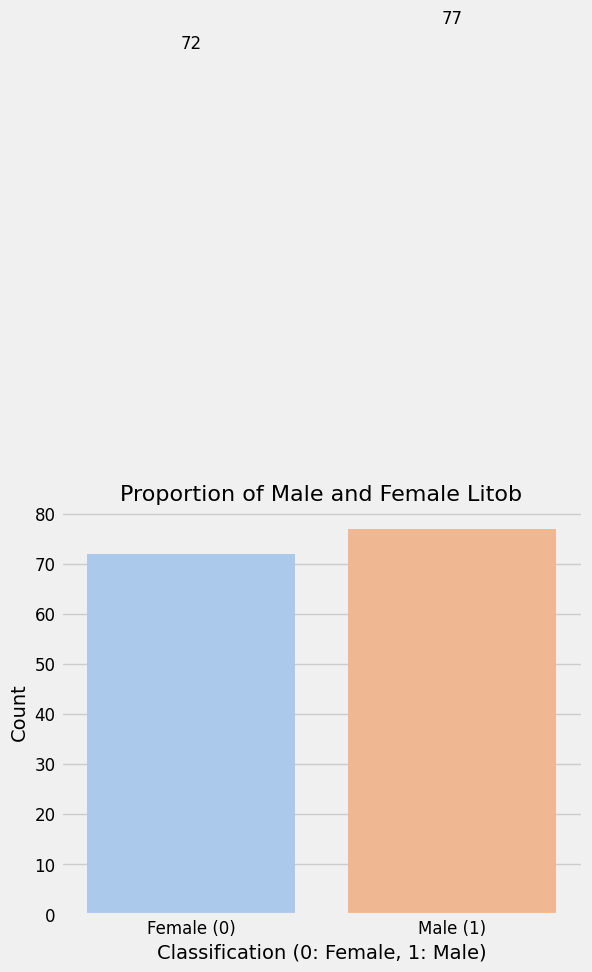

Proportions of Classes:
Label
0    0.483221
1    0.516779
Name: count, dtype: float64


In [43]:
#### plot visualizations for the no. of male and female
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))
sns.countplot(x='Label', data=litob_combined, palette= 'pastel')
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

## calculating the counts
counts = litob_combined['Label'].value_counts().sort_index()

for index in counts.index:
    plt.text(index, counts[index] + 100, str(counts[index]), ha='center', va='bottom', fontsize=12)

## plot visualizations
plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()
proportions = counts / counts.sum()
print('Proportions of Classes:')
print(proportions)

In [47]:
litob_features = litob_combined.columns.drop(['Label'])
x = litob_combined[litob_features]
y = litob_combined['Label']

variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,0.373832,0.461728,0.405530,0.6,0.586957,0.089706,0.282637,0.463827,0
6,0.349533,0.209877,0.410138,0.6,0.567391,0.058824,0.595267,0.425835,0
12,0.196262,0.288889,0.364055,0.8,0.521739,0.101471,0.268557,0.296838,0
18,0.448598,0.335802,0.400922,0.8,0.434783,0.089706,0.542448,0.566613,0
24,0.082243,0.261728,0.417051,0.6,0.404348,0.069118,0.147179,0.077190,0
...,...,...,...,...,...,...,...,...,...
852,0.525234,0.550617,0.585253,0.4,0.347826,0.098529,0.359540,0.388205,1
858,0.373832,0.303704,0.394009,0.8,0.352174,0.136765,0.488493,0.481778,1
864,0.611215,0.666667,0.564516,0.6,0.480435,0.072059,0.326047,0.515221,1
870,0.237383,0.350617,0.377880,1.0,0.310870,0.058824,0.244688,0.330081,1


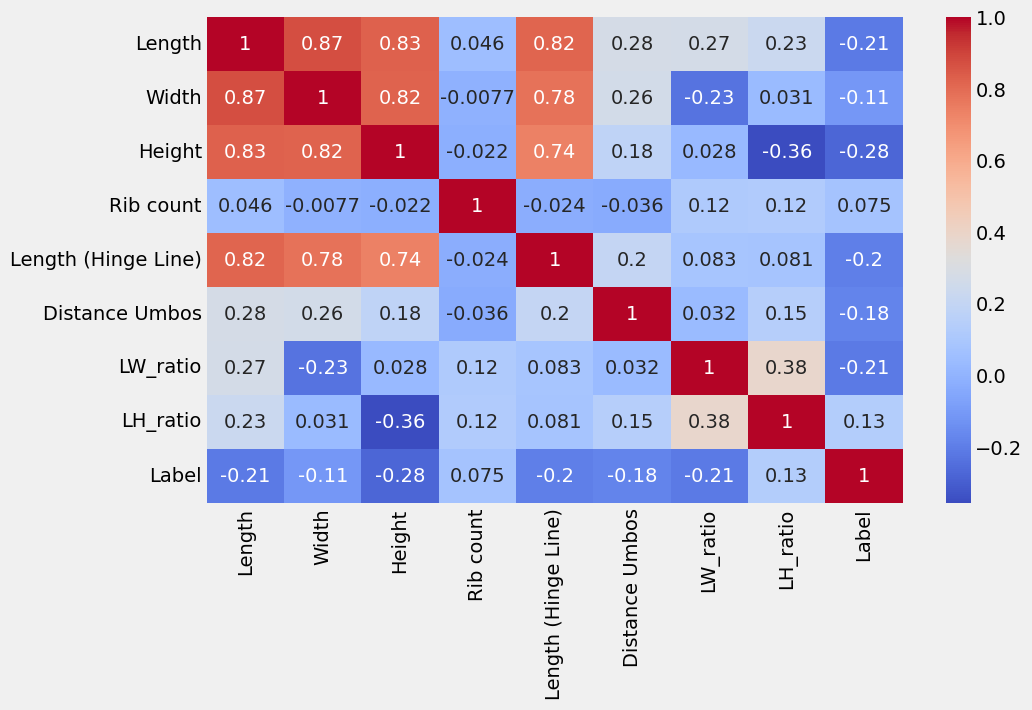

In [48]:
corr = variable_corr.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()